# UMAP-based topographic architecture of whole-brain spontaneous dynamics

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import umap
import numpy as np
import scipy.io as sio
import matplotlib

In [3]:
model_name = '../data/mapper_umap_final.sav'
mapper_umap = pickle.load((open(model_name, 'rb')))
Xplot = mapper_umap.embedding_

In [4]:
plt.style.use("seaborn-whitegrid")

In [5]:

# s200 = pd.read_csv('/share/user_data/tianx/Schaefer200n7.csv')
# tianyetxt = 'Tian_Subcortex_S4_3T_label.txt'
# tianyelabel = f'/share/data/templates/subcortex/Group-Parcellation/3T/Subcortex-Only/{tianyetxt}'
# tianyelabel = list(np.loadtxt(tianyelabel, dtype='str'))
# s200label = s200.Schaefer200N7.values.tolist()
# tianyelabel_l1 = [i.split('-')[0] for i in tianyelabel]
# tianyelabel_l1 = np.array(tianyelabel_l1)
# tianyelabel_l1[np.where(tianyelabel_l1 =='mAMY')] = 'AMY'
# tianyelabel_l1[np.where(tianyelabel_l1 =='lAMY')] = 'AMY'
# tianyelabel_l1[np.where(tianyelabel_l1 =='pGP')] = 'GP'
# tianyelabel_l1[np.where(tianyelabel_l1 =='aGP')] = 'GP'
# tianyelabel_l1 = list(tianyelabel_l1)


In [6]:
## 7 cortical networks + 7 subcortical structures + cerebullim
target_names = ['Vis', 'SomMot','DorsAttn','SalVentAttn','Limbic', 'Cont', 'Default', # cortical networks
                 'HIP','THA', 'PUT','CAU', 'AMY','NAc','GP', 'Cerebellum']
y_target =  np.load('y_271_target_15.npy') ## index for 271 brain ROIs into corresponding network/sturcture
markerlist = ['o']*7+['h']*7+['D']*1 ## plot shape for different sturcture

## colors for different structures / cortical networks
net7color  = ['#8a45a1', '#5991c0','#428a5a','#52BE80','#ffff99','#f4a571','#f2460d'] ## yeo7network

## we summary putamen (PUT), caudate (CAU), nucleus accumbens (NAc) and globus pallidus (GP) as striatum.
striatum_color = '#F2790F'
hipp_color = '#F29191'
amy_color = '#2484BF'
thalmas_color = '#32A62E'
subc_Striatum_colors = [hipp_color,thalmas_color,striatum_color,striatum_color,amy_color ,striatum_color,striatum_color] 

## colors for different func networks / structures
colors_plot_level1 = net7color + ['#a9a9a9']*7 + ['#464646']
colors_plot_level2 = net7color + subc_Striatum_colors + ['k']* 1

##  parameters for plotting 
figsize = (6,6)

## Overview of UMAP embedding

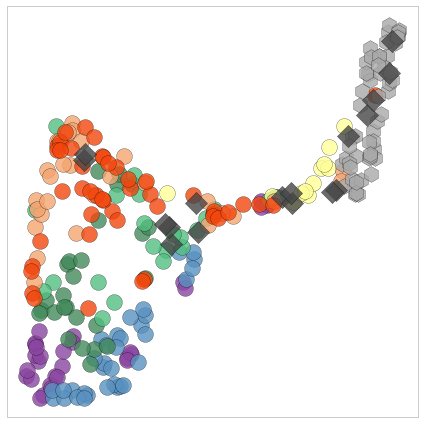

In [7]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
for color, i in zip(colors_plot_level1, list(range(len(target_names)))):
    ax.scatter(Xplot[y_target == i, 0], Xplot[y_target == i, 1], color= color,s=250, lw = 0.3,
                alpha = 0.8,edgecolor='k',marker = markerlist[i])
ax.set(xticks=[], yticks=[])
fig.tight_layout()


## Map functional gradient onto cortical embedding

In [8]:

colormap = 'coolwarm'
cmap = matplotlib.cm.get_cmap(colormap)
gradient = list(np.load('Scheafer200N7_gradient.npy'))
gradient_clist = []
percentage_yval = []
yval_scale = np.array(gradient)
for yval in yval_scale:
    pval = 1- np.count_nonzero(yval_scale[yval_scale>yval])/yval_scale.shape[0]
    gradient_clist.append(cmap(pval))


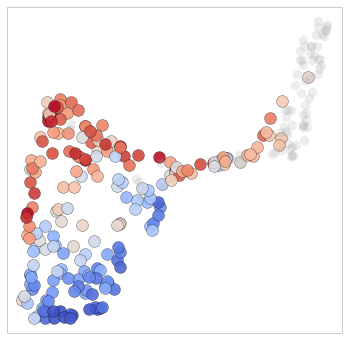

In [9]:
fig,ax =plt.subplots(figsize = figsize)
## cortical regions
for i in range(200):
    plt.scatter(Xplot[i,0], Xplot[i,1], 
                color= gradient_clist[i],alpha=.9,lw=0.3,s=140, edgecolor='k',)

for i in range(200,271):
    plt.scatter(Xplot[i,0], Xplot[i,1], color= '#a9a9a9',
                alpha=0.2,lw=0.3,s=90, edgecolor='#8c8c8c',marker = 'h')
    
ax.set(xticks=[], yticks=[])
ax.grid(False)



## Subcortical embedding

[[], []]

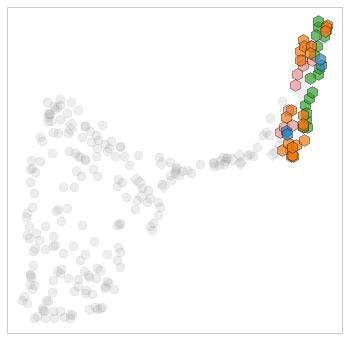

In [10]:
fig,ax =plt.subplots(figsize = figsize)
for color,i, in zip(colors_plot_level2, list(range(len(colors_plot_level2)))):
    if i not in [7,8,9,10,11,12,13]: 
        plt.scatter(Xplot[y_target == i, 0], Xplot[y_target == i, 1], 
                    color= '#a9a9a9',lw=0.5,s=80,alpha = 0.2,edgecolor='#8c8c8c',marker = markerlist[i])
    else:
        ## plot subcortex regions
        plt.scatter(Xplot[y_target == i, 0], Xplot[y_target == i, 1], color= color,lw=0.5,s=140,
                    alpha = 0.7,edgecolor='k',marker = markerlist[i])
ax.grid(False)
ax.set(xticks=[], yticks=[])

## Cerebellum embedding

In [11]:
networks17 = { "17Networks_1": "VisA", 
 "17Networks_2": "VisB",
 "17Networks_3": "SomMotA",
 "17Networks_4": "SomMotB",
 "17Networks_5": "DorsAttnA", 
 "17Networks_6": "DorsAttnB", 
 "17Networks_7": "SalVentAttnA",
 "17Networks_8": "SalVentAttnB", 
 "17Networks_9": "LimbicA", 
 "17Networks_10": "LimbicB",
 "17Networks_11": "ContC", 
 "17Networks_12": "ContA", 
 "17Networks_13": "ContB",
 "17Networks_14": "TempPar", 
 "17Networks_15": "DefaultC",
 "17Networks_16": "DefaultA", 
 "17Networks_17": "DefaultB" }
b17label = list(networks17.values())
b17colors1 = np.load('/share/user_data/tianx/b17_roi_colors_list.npy')

[[], []]

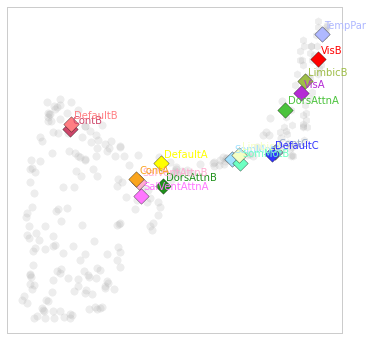

In [13]:

fig,ax =plt.subplots(figsize = figsize)
for color, i,  in zip(colors_plot_level1, list(range(len(colors_plot_level1)))):
    if i in range(14):
        plt.scatter(Xplot[y_target == i, 0], Xplot[y_target == i, 1], 
                    color = '#a9a9a9',lw=0.1,s=60,alpha = 0.2,edgecolor='#8c8c8c',marker = markerlist[i])

for ix,i in enumerate(range(254,271)):
    plt.scatter(Xplot[i,0], Xplot[i,1], 
                # color= list(b17colors1[ix+1]),alpha=.9,
                color = list(b17colors1[ix+1]),
                lw=0.3,s=120,edgecolor='k',marker = 'D')
for i,coord in enumerate(Xplot[254:]):
    ax.text(coord[0]+0.1, coord[1]+0.1,f'{b17label[i]}',fontsize=10,color =list(b17colors1[i+1]) )
    
ax.grid(False)
ax.set(xticks=[], yticks=[])
